In [4]:
import cv2 as cv

# Reading image

In [1]:
import cv2 as cv

img = cv.imread('js.jpg')

cv.imshow('js',img)
cv.waitKey(0)

-1

# Resizing

In [2]:
# from configparser import Interpolation
import cv2 as cv

img = cv.imread('js-big.jpg')
cv.imshow('js big',img)

def rescaleFrame(frame,scale=0.10):
    width = frame.shape[1]*scale
    height = frame.shape[0]*scale
    dimensions = (int(width),int(height))

    return cv.resize(frame,dimensions,interpolation=cv.INTER_AREA)

cv.imshow('js-big',rescaleFrame(img))
cv.waitKey(0)


27

# shapes,text

In [1]:
import cv2 as cv
import numpy as np

blank = np.zeros((500,500,3),dtype='uint8') #creating a blank image
cv.imshow('blank',blank)

#paint
blank[:] = 0,0,255
cv.imshow('Red',blank)


blank[200:300, 300:400] = 175,0,255
cv.imshow('Red',blank)

#rectangle
cv.rectangle(blank, (0,0),(250,250),(255,0,0),thickness=-1) #-1 used to fill the color
cv.imshow('rectangle',blank)

#square
cv.rectangle(blank, (0,0),(blank.shape[1]//2,blank.shape[0]//2),(0,0,0),thickness=-1) #-1 used to fill the color
cv.imshow('square',blank)

#circle
cv.circle(blank,(250,250),50,(0,255,0),thickness=3)
cv.imshow('circle',blank)

#line
cv.line(blank,(0,0),(blank.shape[1]//2,blank.shape[0]//2),(255,255,255),thickness=3)
cv.imshow('line',blank)

#text
cv.putText(blank,'hi',(175,175),cv.FONT_HERSHEY_TRIPLEX,1.0,(255,255,255),2)
cv.imshow('text',blank)

cv.waitKey(0)


-1

# Basic functions

In [2]:
import cv2 as cv

img = cv.imread('js.jpg')
cv.imshow('js',img)

#Converting BGR-Grayscale image
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('gray',gray)

#Blur
blur = cv.GaussianBlur(img,(5,5),cv.BORDER_DEFAULT)
cv.imshow('blur',blur)

#Canny Edge Detection
canny1 = cv.Canny(img,150,200) #instead of passing img , blur can also be passed to have a plain effect
cv.imshow('canny',canny1)#Finding edges

#Canny Edge Detection
canny = cv.Canny(blur,150,200) #blur can also be passed to have a plain effect
cv.imshow('canny with blur',canny)#Canny Edge Detection

#dilating
dilated = cv.dilate(canny,(7,7),iterations=3)
cv.imshow('dilated',dilated)

#eroding
eroded = cv.erode(dilated,(7,7),iterations=3)
cv.imshow('eroded',eroded)

#resize
resized = cv.resize(img,(500,500))
cv.imshow('resize',resized)

#crop
cropped = img[50:200,200:400]
cv.imshow('crop',cropped)#cropped image


cv.waitKey(0)


-1

# Image Transformations

In [3]:
import cv2 as cv
import numpy as np

img = cv.imread('avengers.jpg')
cv.imshow('avengers',img)

#translation 
''' -x for left
    -y for up
     x for right
     y for down'''

def translate(img,x,y):
    M = np.float32([[1,0,x],[0,1,y]])
    dimensions = (img.shape[1],img.shape[0])
    return cv.warpAffine(img,M,dimensions)

translated = translate(img,100,100)
cv.imshow('translate',translated)

#Rotation
def rotate(img,angle,rotatePoint=None):
    (height,width) = img.shape[:2]
    
    if rotatePoint is None:
        rotatePoint = (width//2,height//2)
    
    R = cv.getRotationMatrix2D(rotatePoint,angle,1.0)
    dimensions = (width,height)
    
    return cv.warpAffine(img,R,dimensions)

rotated = rotate(img,45) #By default it will rotate anti-clockwise , for clockwise pass negative value eg -45
cv.imshow('rotated',rotated)

#Resizing
resized = cv.resize(img,(500,500),interpolation = cv.INTER_CUBIC)
cv.imshow('resize',resized)

#flipping 
'''0 for vertical
1 for horizontal
-1 for both'''
# flipped = cv.flip(img,0) #vertical
# flipped = cv.flip(img,1) #horizontal
flipped = cv.flip(img,-1) #both
cv.imshow('flipped',flipped)

#Crop
cropped = img[100:450,150:500]
cv.imshow('cropped',cropped)
cv.waitKey(0)

-1

# Contour Detection

In [31]:
import cv2 as cv
import numpy as np


img = cv.imread('js.jpg')
cv.imshow('js',img)

blank = np.zeros(img.shape,dtype='uint8')
cv.imshow('blank',blank)

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY) #converting to a gray scale image
cv.imshow('gray',gray)

blur = cv.GaussianBlur(gray, (7,7),cv.BORDER_DEFAULT)#blurring
cv.imshow('blur',blur)

canny = cv.Canny(img,125,175) #Edge detection using Canny
cv.imshow('canny',canny)

ret,thresh = cv.threshold(gray,125,255,cv.THRESH_BINARY) #threshold used to binarise the image
cv.imshow('thresh',thresh)

contours,hierarchies = cv.findContours(canny,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE) #passing canny
print(f'{len(contours)} contours found using canny')

contours,hierarchies = cv.findContours(thresh,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)#passing thresh
print(f'{len(contours)} contours found using thresh')

cv.drawContours(blank,contours,-1,(0,0,255),1)
cv.imshow('contours drawn',blank)
cv.waitKey(0)

516 contours found using canny
270 contours found using thresh


-1

# Color spaces 

In [32]:
import cv2 as cv
import matplotlib.pyplot as plt


img = cv.imread('boston.jpg')
cv.imshow('boston',img)

''' opencv by default reads in BGR format 
whereas matplotlib by default read in RGB format'''
# plt.imshow(img)
# plt.show()

#BGR to Gray scale
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('gray',gray)

#BGR to HSV (hue,saturation values)
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
cv.imshow('hsv',hsv)

#BGR to lAB (l*a*b)
lab = cv.cvtColor(img,cv.COLOR_BGR2LAB)
cv.imshow('lab',lab)

#BGR to RGB
rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
cv.imshow('rgb',rgb)

cv.waitKey(0)

-1

# Color channels

In [5]:
import cv2 as cv
import numpy as np

img = cv.imread('boston.jpg')
cv.imshow('boston',img)

blank = np.zeros(img.shape[:2],dtype='uint8')

blue = cv.merge([b,blank,blank])
green = cv.merge([blank,g,blank])
red = cv.merge([blank,blank,r])

cv.imshow('blue1',blue)
cv.imshow('green1',green)
cv.imshow('red1',red)

b,g,r = cv.split(img) #splitting BGR into individual color components

cv.imshow('blue',b)
cv.imshow('green',g)
cv.imshow('red',r)

print(f'{img.shape} image shape ')
print(f'{b.shape} Blue shape ')
print(f'{g.shape} Green shape ')
print(f'{r.shape} Red shape ')

merged = cv.merge([b,g,r]) #Merging Color channels
cv.imshow('merged',merged)

cv.waitKey(0)

(252, 404, 3) image shape 
(252, 404) Blue shape 
(252, 404) Green shape 
(252, 404) Red shape 


-1

# Blurring Techniques

In [13]:
import cv2 as cv

img = cv.imread('cats.jpg')
cv.imshow('cats',img)

#Averaging  the middle pixel element would be the average of the neighboring pixels
average = cv.blur(img,(3,3))
cv.imshow('average',average)

#Gaussianblur
gauss = cv.GaussianBlur(img,(3,3),0)
cv.imshow('gauss',gauss)

#Median the middle pixel element would be the median of the neighboring pixels
median = cv.medianBlur(img,3)
cv.imshow('median',median)

#Bilateral Blurring
bilateral = cv.bilateralFilter(img,15,15,15)
cv.imshow('bilateral',bilateral)

cv.waitKey(0)

-1

# Bitwise Operations

In [19]:
import cv2 as cv
import numpy as np

blank = np.zeros((400,400),dtype='uint8')

rectangle = cv.rectangle(blank.copy(),(30,30),(350,350),255,-1)
circle = cv.circle(blank.copy(),(200,200),200,255,-1)

cv.imshow('rectangle',rectangle)
cv.imshow('circle',circle)

#bitwise AND returns the intersection of two images
bitwise_and = cv.bitwise_and(rectangle,circle)
cv.imshow('and',bitwise_and)

#bitwise OR returns combination of two images
bitwise_or = cv.bitwise_or(rectangle,circle)
cv.imshow('or',bitwise_or)

#bitwise Xor returns non intersecting regions
bitwise_xor = cv.bitwise_xor(rectangle,circle)
cv.imshow('xor',bitwise_xor)

#bitwise not 
bitwise_not = cv.bitwise_not(rectangle)
cv.imshow('not',bitwise_not)

cv.waitKey(0)

-1

# Masking

In [33]:
import cv2 as cv
import numpy as np
#Masking is the way of focusing on part of the image

img = cv.imread('cats.jpg')
cv.imshow('cats',img)

blank = np.zeros(img.shape[:2],dtype='uint8')
cv.imshow('blank',blank)

circle = cv.circle(blank,(img.shape[1]//2,img.shape[0]//2),100,255,-1)
cv.imshow('circle',circle)

masked = cv.bitwise_and(img,img,mask=mask)
cv.imshow('masked',masked)



cv.waitKey(0)

-1

# Computing Histograms

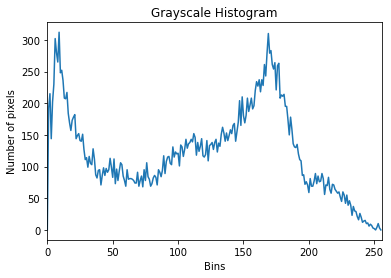

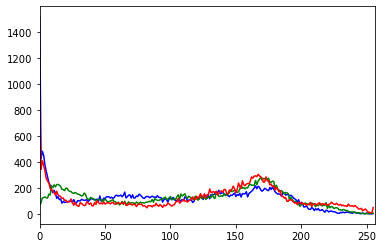

-1

In [10]:
#Histograms helps in visualizing pixel distrubutions in image
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('cats.jpg')
cv.imshow('cat',img)

blank = np.zeros(img.shape[:2],dtype='uint8')
cv.imshow('blank',blank)

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('gray',gray)

circle = cv.circle(blank,(img.shape[1]//2,img.shape[0]//2),100,225,-1)
cv.imshow('circle',circle)

mask = cv.bitwise_and(gray,gray,mask=circle)
cv.imshow('mask',mask)

#grayscale histogram
gray_hist = cv.calcHist([gray],[0],mask,[256],[0,256])

plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('Number of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

circle1 = cv.circle(blank,(img.shape[1]//2,img.shape[0]//2),100,225,-1)# In[ ]:
cv.imshow('circle1',circle1)

mask1 = cv.bitwise_and(img,img,mask=circle)
cv.imshow('mask1',mask1)
#color histogram
colors = ('b','g','r')
for i,col in enumerate(colors):
    hist = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,256])
    
plt.show()


cv.waitKey(0)

# Thresholding

In [19]:
import cv2 as cv


img = cv.imread('cats.jpg')
cv.imshow('cats',img)

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('gray',gray)

#simple thresholding
thresholding,thresh = cv.threshold(gray,150,255,cv.THRESH_BINARY)  
cv.imshow('simple threshold',thresh)

thresholding,thresh_inv = cv.threshold(gray,150,255,cv.THRESH_BINARY_INV)
cv.imshow('simple threshold inv',thresh_inv)

#adaptive thresholding
adaptive_thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,3)
cv.imshow('adaptive thresh',adaptive_thresh)

adaptive_thresh_inv = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV,11,3)
cv.imshow('adaptive thresh inv',adaptive_thresh_inv)


cv.waitKey(0)

-1

# Edge detection

In [34]:
import cv2 as cv

img = cv.imread('boston.jpg')
cv.imshow('img',img)

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('gray',gray)

#laplacian 
lap = cv.Laplacian(gray,cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cv.imshow('Laplacian',lap)

#sobel
sobelx = cv.Sobel(gray,cv.CV_64F,1,0)#sobelx
sobely = cv.Sobel(gray,cv.CV_64F,0,1)#sobely
combined_sobel = cv.bitwise_or(sobelx,sobely)

cv.imshow('sobel x',sobelx)
cv.imshow('Sobel combined',combined_sobel)
cv.imshow('sobel y',sobely)

#canny
canny = cv.Canny(gray,150,175)
cv.imshow('canny',canny)
cv.waitKey(0)

-1

# Face Detection using HaarCascade

In [6]:
import cv2 as cv

img = cv.imread('bale.jpg')
cv.imshow('bale', img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray People', gray)

haar_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3)

print(f'Number of faces found = {len(faces_rect)}')

for (x,y,w,h) in faces_rect:
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)

cv.imshow('Detected Faces', img)
cv.waitKey(0)

Number of faces found = 2


-1